<a href="https://colab.research.google.com/github/PathiniE/video-storage-problem-using-genetic-algorithm/blob/main/video_storage_problem_genetic_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

::Video Storing Problem with Genetic Algorithm & ::
Number of videos: 10
DVD capacity: 4500 MB
Total size of all videos: 8775 MB
Total time of all videos: 1117 minutes

GENETIC ALGORITHM PERFORMANCE ANALYSIS SUITE

1. BASIC EXPERIMENT WITH PERFORMANCE TRACKING:
Running Basic Genetic Algorithm Experiment with Performance Tracking

Starting Genetic Algorithm with:
Population size: 50
Generations: 100
Crossover rate: 0.7 (method: single_point)
Mutation rate: 0.1 (method: bitflip)

Generation   0: Best =  589
Generation  10: Best =  614
Generation  20: Best =  614
Generation  30: Best =  614
Generation  40: Best =  614
Generation  50: Best =  614
Generation  60: Best =  614
Generation  70: Best =  614
Generation  80: Best =  614
Generation  90: Best =  614

 Best solution found!
Best fitness: 614.0 minutes

 Solution Analysis:
Selected movies: [1, 4, 7, 8, 9]
Total size: 4425 MB (out of 4500 MB)
Total time: 614 minutes (10.2 hours)
Space used: 98.3%

Detailed breakdown:
  Movie 1: 800 MB, 

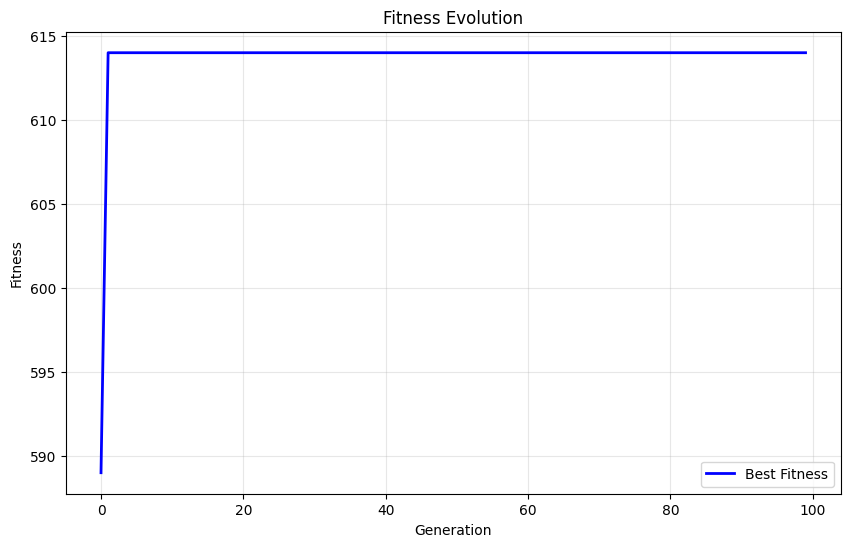



2. COMPREHENSIVE PERFORMANCE ANALYSIS:

 COMPREHENSIVE PERFORMANCE ANALYSIS

--- Testing Single Point + BitFlip ---
  Run 1/10 (Score: 614)
  Run 2/10 (Score: 614)
  Run 3/10 (Score: 614)
  Run 4/10 (Score: 614)
  Run 5/10 (Score: 614)
  Run 6/10 (Score: 614)
  Run 7/10 (Score: 614)
  Run 8/10 (Score: 614)
  Run 9/10 (Score: 614)
  Run 10/10 (Score: 614)

--- Testing Single Point + Interchange ---
  Run 1/10 (Score: 614)
  Run 2/10 (Score: 614)
  Run 3/10 (Score: 614)
  Run 4/10 (Score: 609)
  Run 5/10 (Score: 613)
  Run 6/10 (Score: 614)
  Run 7/10 (Score: 614)
  Run 8/10 (Score: 614)
  Run 9/10 (Score: 614)
  Run 10/10 (Score: 613)

--- Testing Uniform + BitFlip ---
  Run 1/10 (Score: 614)
  Run 2/10 (Score: 614)
  Run 3/10 (Score: 614)
  Run 4/10 (Score: 614)
  Run 5/10 (Score: 614)
  Run 6/10 (Score: 614)
  Run 7/10 (Score: 614)
  Run 8/10 (Score: 614)
  Run 9/10 (Score: 614)
  Run 10/10 (Score: 614)

--- Testing Uniform + Interchange ---
  Run 1/10 (Score: 614)
  Run 2/10 (Score

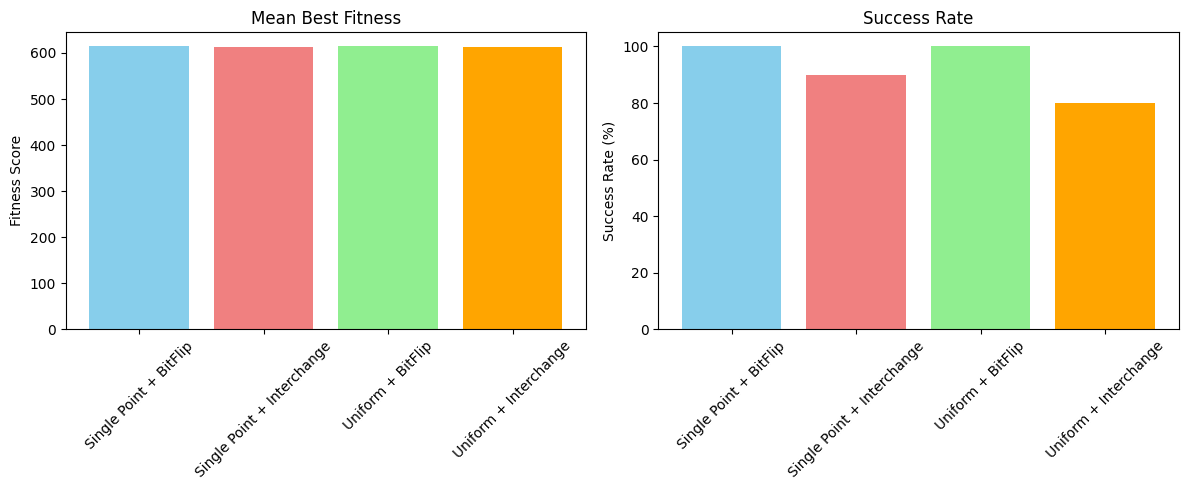

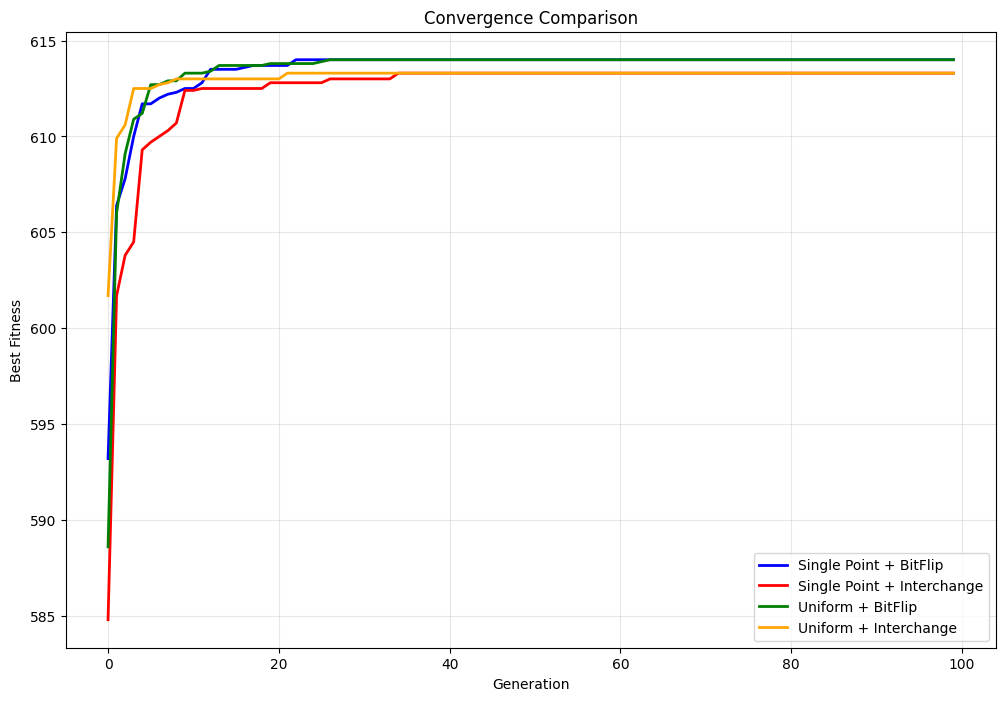



3. HYPERPARAMETER TUNING ANALYSIS:

 HYPERPARAMETER TUNING ANALYSIS

Testing: Pop=20, CrossRate=0.5, MutRate=0.01

Testing: Pop=20, CrossRate=0.5, MutRate=0.05

Testing: Pop=20, CrossRate=0.5, MutRate=0.1

Testing: Pop=20, CrossRate=0.7, MutRate=0.01

Testing: Pop=20, CrossRate=0.7, MutRate=0.05

Testing: Pop=20, CrossRate=0.7, MutRate=0.1

Testing: Pop=20, CrossRate=0.9, MutRate=0.01

Testing: Pop=20, CrossRate=0.9, MutRate=0.05

Testing: Pop=20, CrossRate=0.9, MutRate=0.1

Testing: Pop=50, CrossRate=0.5, MutRate=0.01

Testing: Pop=50, CrossRate=0.5, MutRate=0.05

Testing: Pop=50, CrossRate=0.5, MutRate=0.1

Testing: Pop=50, CrossRate=0.7, MutRate=0.01

Testing: Pop=50, CrossRate=0.7, MutRate=0.05

Testing: Pop=50, CrossRate=0.7, MutRate=0.1

Testing: Pop=50, CrossRate=0.9, MutRate=0.01

Testing: Pop=50, CrossRate=0.9, MutRate=0.05

Testing: Pop=50, CrossRate=0.9, MutRate=0.1

Testing: Pop=100, CrossRate=0.5, MutRate=0.01

Testing: Pop=100, CrossRate=0.5, MutRate=0.05

Testing: Pop=

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
import statistics

# Video data from the problem
movie_sizes = [800, 700, 650, 750, 600, 900, 950, 875, 1050, 1500]  # MB
movie_times = [121, 95, 85, 100, 78, 125, 130, 128, 135, 120]       # minutes
max_space = 4500  # DVD capacity in MB

print("::Video Storing Problem with Genetic Algorithm & ::")
print("=" * 80)
print(f"Number of videos: {len(movie_sizes)}")
print(f"DVD capacity: {max_space} MB")
print(f"Total size of all videos: {sum(movie_sizes)} MB")
print(f"Total time of all videos: {sum(movie_times)} minutes")
print()

def fitness_function(solution):
    """Calculate how good a solution is with penalty weight"""
    total_size = 0
    total_time = 0

    for i in range(len(solution)):
        if solution[i] == 1:
            total_size += movie_sizes[i]
            total_time += movie_times[i]

    # Apply penalty weight
    if total_size <= max_space:
        weight = 1.0  # Wi = 1
    else:
        weight = 0.5  # Wi = 0.5

    fitness = weight * total_time
    return fitness

def create_random_solution():
    """Make a random solution"""
    return [random.randint(0, 1) for _ in range(len(movie_sizes))]

def create_population(size):
    """Create many random solutions"""
    return [create_random_solution() for _ in range(size)]

def tournament_selection(population, fitness_scores, tournament_size=3):
    """Pick good solutions more often"""
    selected = []
    for _ in range(len(population)):
        # Pick random solutions for tournament
        tournament_indices = random.sample(range(len(population)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament_indices]

        # Pick the best one from tournament
        winner_index = tournament_indices[tournament_fitness.index(max(tournament_fitness))]
        selected.append(population[winner_index])

    return selected

# ENHANCED CROSSOVER METHODS
def single_point_crossover(parent1, parent2, crossover_rate=0.7):
    """Single point crossover"""
    if random.random() < crossover_rate:
        cut_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:cut_point] + parent2[cut_point:]
        child2 = parent2[:cut_point] + parent1[cut_point:]
        return child1, child2
    else:
        return parent1.copy(), parent2.copy()

def uniform_crossover(parent1, parent2, crossover_rate=0.7):
    """Uniform crossover - each bit has 50% chance of being swapped"""
    if random.random() < crossover_rate:
        child1 = []
        child2 = []
        for i in range(len(parent1)):
            if random.random() < 0.5:
                child1.append(parent1[i])
                child2.append(parent2[i])
            else:
                child1.append(parent2[i])
                child2.append(parent1[i])
        return child1, child2
    else:
        return parent1.copy(), parent2.copy()

def crossover(parent1, parent2, crossover_rate=0.7, method='single_point'):
    """Enhanced crossover with multiple methods"""
    if method == 'single_point':
        return single_point_crossover(parent1, parent2, crossover_rate)
    elif method == 'uniform':
        return uniform_crossover(parent1, parent2, crossover_rate)
    else:
        return single_point_crossover(parent1, parent2, crossover_rate)

# ENHANCED MUTATION METHODS
def bitflip_mutation(solution, mutation_rate=0.1):
    """Bitflip mutation - randomly flip bits"""
    new_solution = solution.copy()
    for i in range(len(new_solution)):
        if random.random() < mutation_rate:
            new_solution[i] = 1 - new_solution[i]  # flip bit
    return new_solution

def interchange_mutation(solution, mutation_rate=0.1):
    """Interchange mutation - swap two random positions"""
    new_solution = solution.copy()
    if random.random() < mutation_rate:
        # Select two random positions to swap
        pos1, pos2 = random.sample(range(len(new_solution)), 2)
        new_solution[pos1], new_solution[pos2] = new_solution[pos2], new_solution[pos1]
    return new_solution

def mutate(solution, mutation_rate=0.1, method='bitflip'):
    """Enhanced mutation with multiple methods"""
    if method == 'bitflip':
        return bitflip_mutation(solution, mutation_rate)
    elif method == 'interchange':
        return interchange_mutation(solution, mutation_rate)
    else:
        return bitflip_mutation(solution, mutation_rate)

def hyperparameter_tuning_analysis():
    """Grid search over population size, crossover rate, and mutation rate"""
    print("\n" + "="*80)
    print(" HYPERPARAMETER TUNING ANALYSIS")
    print("="*80)

    population_sizes = [20, 50, 100]
    crossover_rates = [0.5, 0.7, 0.9]
    mutation_rates = [0.01, 0.05, 0.1]

    num_runs = 5  # Reduce to 5 for quick results, increase to 10+ for final report
    results = []

    for pop_size in population_sizes:
        for cr in crossover_rates:
            for mr in mutation_rates:
                print(f"\nTesting: Pop={pop_size}, CrossRate={cr}, MutRate={mr}")
                metrics = PerformanceMetrics()

                for run in range(num_runs):
                    _, best_score, _ = genetic_algorithm_with_performance(
                        population_size=pop_size,
                        generations=100,
                        crossover_rate=cr,
                        mutation_rate=mr,
                        crossover_method='single_point',
                        mutation_method='bitflip',
                        verbose=False
                    )
                    metrics.add_run_data(best_score)

                stats = metrics.calculate_statistics()
                results.append({
                    'population_size': pop_size,
                    'crossover_rate': cr,
                    'mutation_rate': mr,
                    'mean_best_fitness': stats['mean_best_fitness'],
                    'success_rate': stats['success_rate']
                })

    # Print summary
    print(f"\n{'Population':<10} {'Crossover':<10} {'Mutation':<10} {'MeanFit':<10} {'SuccessRate':<12}")
    print("-" * 60)
    for r in results:
        print(f"{r['population_size']:<10} {r['crossover_rate']:<10.2f} {r['mutation_rate']:<10.2f} "
              f"{r['mean_best_fitness']:<10.2f} {r['success_rate']:<10.1f}%")

# SIMPLIFIED PERFORMANCE MEASUREMENT CLASS
class PerformanceMetrics:
    """Class to track only mean best fitness and success rate"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.final_fitness_scores = []
        self.success_threshold = 613

    def add_run_data(self, final_fitness):
        self.final_fitness_scores.append(final_fitness)

    def calculate_statistics(self):
        """Calculate only mean best fitness and success rate"""
        stats = {}

        # Mean Best Fitness
        stats['mean_best_fitness'] = np.mean(self.final_fitness_scores)

        # Success Rate
        successful_runs = sum(1 for score in self.final_fitness_scores if score >= self.success_threshold)
        stats['success_rate'] = (successful_runs / len(self.final_fitness_scores)) * 100

        return stats

def genetic_algorithm_with_performance(population_size=50, generations=100, crossover_rate=0.7,
                                     mutation_rate=0.1, crossover_method='single_point',
                                     mutation_method='bitflip', verbose=True):
    """Enhanced genetic algorithm with simplified performance tracking"""
    start_time = time.time()

    if verbose:
        print(f"Starting Genetic Algorithm with:")
        print(f"Population size: {population_size}")
        print(f"Generations: {generations}")
        print(f"Crossover rate: {crossover_rate} (method: {crossover_method})")
        print(f"Mutation rate: {mutation_rate} (method: {mutation_method})")
        print()

    # Create initial population
    population = create_population(population_size)
    best_scores = []
    best_solution = None
    best_score = 0

    for generation in range(generations):
        # Calculate fitness for each solution
        fitness_scores = [fitness_function(solution) for solution in population]

        # Track statistics
        current_best_score = max(fitness_scores)
        current_best_solution = population[fitness_scores.index(current_best_score)]

        if current_best_score > best_score:
            best_score = current_best_score
            best_solution = current_best_solution.copy()

        best_scores.append(best_score)

        # Print progress every 10 generations
        if verbose and generation % 10 == 0:
            print(f"Generation {generation:3d}: Best = {best_score:4.0f}")

        # Selection
        selected = tournament_selection(population, fitness_scores)

        # Create new population
        new_population = []
        for i in range(0, len(selected), 2):
            parent1 = selected[i]
            parent2 = selected[i + 1] if i + 1 < len(selected) else selected[0]

            # Enhanced Crossover
            child1, child2 = crossover(parent1, parent2, crossover_rate, crossover_method)

            # Enhanced Mutation
            child1 = mutate(child1, mutation_rate, mutation_method)
            child2 = mutate(child2, mutation_rate, mutation_method)

            new_population.extend([child1, child2])

        # Keep population size constant
        population = new_population[:population_size]

    return best_solution, best_score, best_scores

def analyze_solution(solution):
    """Show details about a solution"""
    print("\n Solution Analysis:")
    print("=" * 30)

    total_size = 0
    total_time = 0
    selected_movies = []

    for i in range(len(solution)):
        if solution[i] == 1:
            total_size += movie_sizes[i]
            total_time += movie_times[i]
            selected_movies.append(i + 1)

    print(f"Selected movies: {selected_movies}")
    print(f"Total size: {total_size} MB (out of {max_space} MB)")
    print(f"Total time: {total_time} minutes ({total_time/60:.1f} hours)")
    print(f"Space used: {total_size/max_space*100:.1f}%")

    print("\nDetailed breakdown:")
    for i in range(len(solution)):
        if solution[i] == 1:
            print(f"  Movie {i+1}: {movie_sizes[i]} MB, {movie_times[i]} minutes")

    return total_size, total_time

def plot_performance_comparison(results_dict):
    """Plot only mean best fitness and success rate comparison"""
    methods = list(results_dict.keys())

    # Create subplots for only two metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 1. Mean Best Fitness
    mean_fitness = [results_dict[method]['stats']['mean_best_fitness'] for method in methods]
    ax1.bar(methods, mean_fitness, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    ax1.set_title('Mean Best Fitness')
    ax1.set_ylabel('Fitness Score')
    ax1.tick_params(axis='x', rotation=45)

    # 2. Success Rate
    success_rates = [results_dict[method]['stats']['success_rate'] for method in methods]
    ax2.bar(methods, success_rates, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    ax2.set_title('Success Rate')
    ax2.set_ylabel('Success Rate (%)')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_convergence_comparison(results_dict):
    """Plot convergence curves for different methods"""
    plt.figure(figsize=(12, 8))

    colors = ['blue', 'red', 'green', 'orange']

    for i, (method_name, result) in enumerate(results_dict.items()):
        # Calculate average convergence curve
        all_curves = result['best_fitness_histories']
        min_length = min(len(curve) for curve in all_curves)

        avg_curve = []
        for gen in range(min_length):
            gen_scores = [curve[gen] for curve in all_curves]
            avg_curve.append(np.mean(gen_scores))

        generations = range(min_length)
        plt.plot(generations, avg_curve, label=method_name, color=colors[i], linewidth=2)

    plt.title('Convergence Comparison')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def comprehensive_performance_analysis():
    """Run comprehensive performance analysis comparing all methods"""
    print("\n" + "="*80)
    print(" COMPREHENSIVE PERFORMANCE ANALYSIS")
    print("="*80)

    # Define method combinations to test
    method_combinations = [
        {"crossover_method": "single_point", "mutation_method": "bitflip", "name": "Single Point + BitFlip"},
        {"crossover_method": "single_point", "mutation_method": "interchange", "name": "Single Point + Interchange"},
        {"crossover_method": "uniform", "mutation_method": "bitflip", "name": "Uniform + BitFlip"},
        {"crossover_method": "uniform", "mutation_method": "interchange", "name": "Uniform + Interchange"},
    ]

    # Run multiple runs for statistical significance
    num_runs = 10
    results = {}

    for combo in method_combinations:
        print(f"\n--- Testing {combo['name']} ---")
        metrics = PerformanceMetrics()
        best_fitness_histories = []

        for run in range(num_runs):
            print(f"  Run {run+1}/{num_runs}", end=" ")

            best_solution, best_score, best_scores = \
                genetic_algorithm_with_performance(
                    population_size=50,
                    generations=100,
                    crossover_method=combo['crossover_method'],
                    mutation_method=combo['mutation_method'],
                    verbose=False
                )

            metrics.add_run_data(best_score)
            best_fitness_histories.append(best_scores)
            print(f"(Score: {best_score:.0f})")

        # Calculate statistics
        stats = metrics.calculate_statistics()

        results[combo['name']] = {
            'metrics': metrics,
            'stats': stats,
            'best_fitness_histories': best_fitness_histories
        }

    # Display performance comparison
    print(f"\n" + "="*60)
    print(f"{'METHOD':<25} {'MEAN FITNESS':<12} {'SUCCESS RATE':<12}")
    print("="*60)

    best_method = None
    best_score = 0

    for method_name, result in results.items():
        stats = result['stats']
        if stats['mean_best_fitness'] > best_score:
            best_score = stats['mean_best_fitness']
            best_method = method_name

        print(f"{method_name:<25} "
              f"{stats['mean_best_fitness']:<12.1f} "
              f"{stats['success_rate']:<12.1f}%")

    print("="*60)
    print(f"BEST PERFORMING METHOD: {best_method}")
    print("="*60)

    # Detailed statistics for best method
    best_stats = results[best_method]['stats']
    print(f"\nDetailed Statistics for {best_method}:")
    print(f"  Mean Best Fitness: {best_stats['mean_best_fitness']:.2f}")
    print(f"  Success Rate: {best_stats['success_rate']:.1f}%")

    # Plot performance comparisons
    print(f"\nGenerating performance comparison plots...")
    plot_performance_comparison(results)
    plot_convergence_comparison(results)

    return results

def run_basic_experiment():
    """Run the basic experiment with performance tracking"""
    print("Running Basic Genetic Algorithm Experiment with Performance Tracking\n")

    # Run the algorithm with performance tracking
    best_solution, best_score, best_scores = genetic_algorithm_with_performance()

    print(f"\n Best solution found!")
    print(f"Best fitness: {best_score} minutes")

    # Analyze the solution
    total_size, total_time = analyze_solution(best_solution)

    # Plot basic convergence
    plt.figure(figsize=(10, 6))
    plt.plot(best_scores, label='Best Fitness', linewidth=2, color='blue')
    plt.title('Fitness Evolution')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return best_solution, best_score

# Run the main experiment
if __name__ == "__main__":
    # Set random seed for reproducible results
    random.seed(42)
    np.random.seed(42)

    print("GENETIC ALGORITHM PERFORMANCE ANALYSIS SUITE")
    print("="*80)

    # Run basic experiment
    print("\n1. BASIC EXPERIMENT WITH PERFORMANCE TRACKING:")
    best_solution, best_score = run_basic_experiment()

    # Run comprehensive performance analysis
    print("\n\n2. COMPREHENSIVE PERFORMANCE ANALYSIS:")
    performance_results = comprehensive_performance_analysis()

    # Run hyperparameter tuning analysis
    print("\n\n3. HYPERPARAMETER TUNING ANALYSIS:")
    hyperparameter_tuning_analysis()